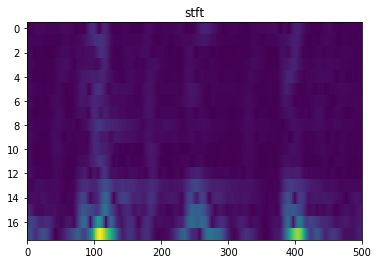

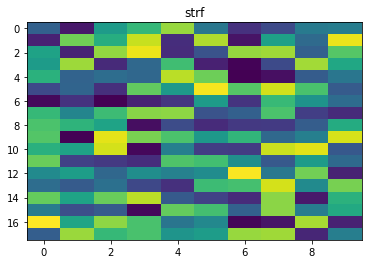

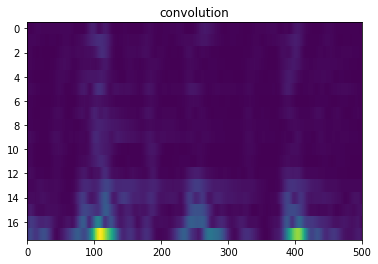

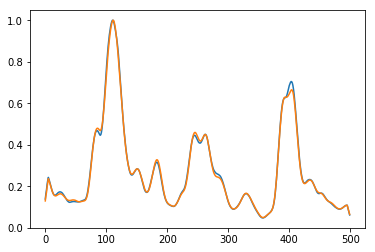

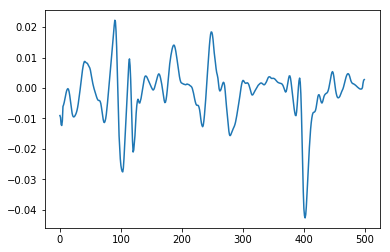

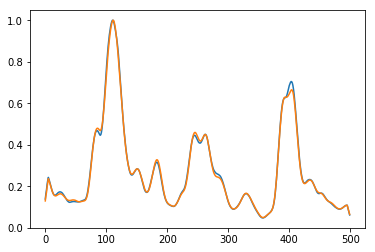

In [196]:
import scipy.io.wavfile as wavefile
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

fs,y = wavefile.read('/home/alexis/Transfer/dummy_test/beat_dummy_short.wav')
new_fs=100

num = int(new_fs * len(y)/fs)
y = signal.resample(y,num)
y=y/np.max(np.abs(y))
nbFbins = 18
nperseg = nbFbins*2-1
f,t,stft = signal.stft(y,new_fs,nperseg=nperseg,noverlap=nperseg-1)
stft=np.abs(stft)
plt.imshow(stft,aspect='auto')
plt.title('stft')
#plt.pcolormesh(t, f, stft)
#plt.title('STFT Magnitude')
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.show()

strf = np.random.rand(np.shape(stft)[0],10)
#strf[10:15,:] = np.concatenate(([0], np.zeros(np.shape(strf)[1]-1)))
plt.figure()
plt.imshow(strf,aspect='auto')
plt.title('strf')

conved = np.zeros(np.shape(stft))
for fbin in range(np.shape(stft)[0]):
    conved[fbin,:] = signal.convolve(stft[fbin,:],strf[fbin,:],method='direct',mode='same')
    
plt.figure()
plt.title('convolution')
plt.imshow(conved,aspect='auto')

plt.figure()
convedThen1D = np.sum(conved,axis=0)/max(np.sum(conved,axis=0))
plt.plot(convedThen1D)


### Compare with conv 1D

conved1D = signal.convolve(np.sum(stft,axis=0),np.sum(strf,axis=0),method='direct',mode='same')
conved1D = conved1D/max(conved1D)
plt.plot(conved1D)

plt.figure()
plt.plot(conved1D-convedThen1D)

## Compare with conv1D on each band
conved1Deach = np.zeros(np.shape(stft)[1])
summedstrf = np.sum(strf,axis=0)
for fbin in range(np.shape(stft)[0]):
    conved1Deach += signal.convolve(stft[fbin,:],summedstrf,method='direct',mode='same')
    
conved1Deach /= max(conved1Deach)
plt.figure()
plt.plot(convedThen1D)
plt.plot(conved1Deach)
